In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,38027,None,None,85821.712770
2020-06-13,38028,None,None,79733.916911
2020-06-14,38029,None,None,74079.170756
2020-06-15,38030,None,None,68752.471576
2020-06-16,38031,None,None,64007.891166
...,...,...,...,...
2021-03-09,38297,None,None,114575.092471
2021-03-10,38298,None,None,110408.836775
2021-03-11,38299,None,None,106439.168683


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-13_2021-03-13-16-31.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-12_2021-03-12-17-30.pickle


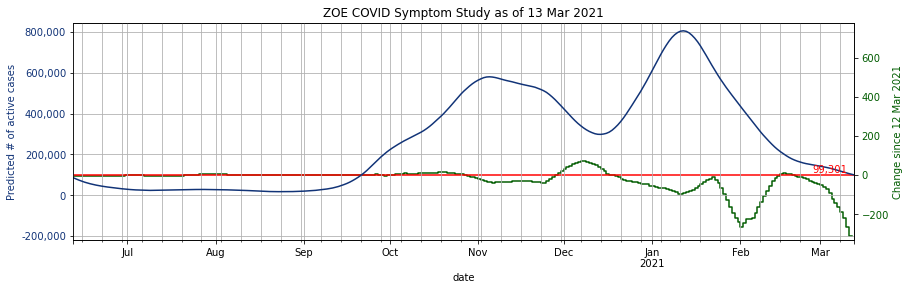

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

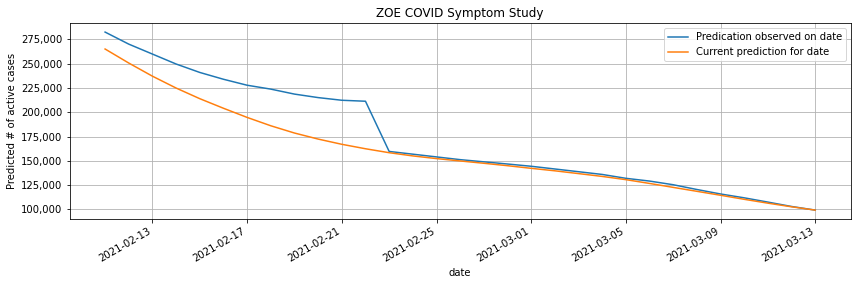

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-13_2021-03-13-16-31.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
280,Doncaster,E08000017,0.831276
194,Staffordshire Moorlands,E07000198,0.777490
65,Amber Valley,E07000032,0.719384
25,Leicester,E06000016,0.691370
70,North East Derbyshire,E07000038,0.672744
161,East Lindsey,E07000137,0.672702
112,Eastbourne,E07000061,0.650234
372,Moray,S12000020,0.642732
268,Oldham,E08000004,0.621212
240,Rotherham,E08000018,0.582847
